In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [2]:
%matplotlib inline


In [177]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

import numpy as np

import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_spectrum import thomson_spec
from darkhistory.electrons.ics.ics_spectrum import rel_spec


In [178]:
Emax_rel = 1e12
Emin_rel = 1e-8
nEe = 500
nEp  = 500

dlnEp = np.log(Emax_rel/Emin_rel)/nEp
lowengEp_rel = Emin_rel*np.exp((np.arange(nEp)+0.5)*dlnEp)        

dlnEe = np.log(Emax_rel/Emin_rel)/nEe
lowengEe_rel = Emin_rel*np.exp((np.arange(nEe)+0.5)*dlnEe)

ics_rel_tf = rel_spec(phys.me+lowengEe_rel, lowengEp_rel, 0.25, inf_upp_bound=True)
ics_rel_tf_corr = rel_spec(phys.me+lowengEe_rel, lowengEp_rel, 0.25, inf_upp_bound=False)

Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!


In [179]:
from darkhistory.electrons.ics.BE_integrals import *
from darkhistory.spec.transferfunction import TransFuncAtRedshift

def corr_term(eleceng, photeng, T):
    
    gamma  = eleceng/phys.me
    prefac = 3*phys.thomson_xsec*phys.c*np.pi/(2*(phys.ele_compton * phys.me)**3 * gamma**4)
    
    low_lim = np.outer(1. + 1/gamma, photeng)/T
    upp_lim = np.outer(4*gamma**2, photeng)/T
    
    term_1 = np.transpose(np.transpose(F0(low_lim, upp_lim))*4*gamma**2)*photeng*T
    term_2 = -F1(low_lim, upp_lim)*T**2
    
    return TransFuncAtRedshift(
        np.transpose(prefac * np.transpose((term_1 + term_2))), in_eng = eleceng - phys.me, eng = photeng, 
        rs = np.ones_like(eleceng)*T/phys.TCMB(1), dlnz=-1,
        spec_type = 'dNdE'
    ) 

ics_rel_tf_low_corr = corr_term(phys.me+lowengEe_rel, lowengEp_rel, 0.25)

total_corr = TransFuncAtRedshift(
    ics_rel_tf_low_corr.grid_vals + ics_rel_tf_corr.grid_vals, in_eng = lowengEe_rel, eng = lowengEp_rel, 
    rs = np.ones_like(lowengEe_rel)*0.25/phys.TCMB(1), dlnz=-1, spec_type='dNdE'
)

In [180]:
thomson_tf = thomson_spec(lowengEe_rel, lowengEp_rel, 0.25)

Initializing...
***** Computing Spectra by Expansion in beta ...... Complete! *****
***** Computing Spectra by Analytic Series... *****
Series 1/12...
Series 2/12...
Series 3/12...
Series 4/12...
Series 5/12...
Series 6/12...
Series 7/12...
Series 8/12...
Series 9/12...
Series 10/12...
Series 11/12...
Series 12/12...
***** Analytic Series Computation Complete! *****
########### Spectrum computed! ###########


[1e-08, 5109989461.0, 1e-12, 0.0001]

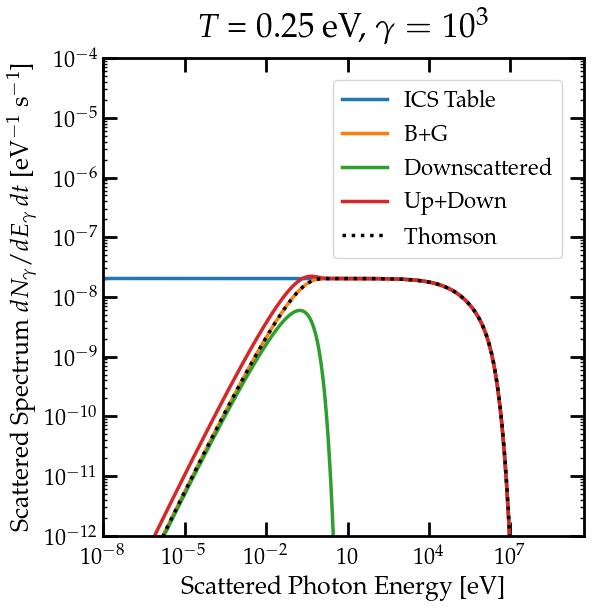

In [189]:
plt.figure()

ax = plt.gca()
ax.loglog()

Ee = 1000*phys.me

ics_rel_tf.plot(ax, ind=Ee, indtype='in_eng')
ics_rel_tf_corr.plot(ax, ind=Ee, indtype='in_eng')
ics_rel_tf_low_corr.plot(ax, ind=Ee, indtype='in_eng')
total_corr.plot(ax, ind=Ee, indtype='in_eng')
thomson_tf.plot(ax, ind=Ee, indtype='in_eng', linestyle=':', color='k')

plt.legend(
    ['ICS Table', 'B+G', 'Downscattered', 'Up+Down', 'Thomson']
)

plt.title(r'$T$ = 0.25 eV, $\gamma = 10^3$')
plt.xlabel('Scattered Photon Energy [eV]')
plt.ylabel(r'Scattered Spectrum $dN_\gamma/dE_\gamma \, dt$ [eV$^{-1}$ s$^{-1}$]')


plt.axis([1e-8, 10*Ee, 1e-12, 1e-4])

In [194]:
%autoreload
rel_spec(np.array([1000*phys.me, 1000*phys.me, 1000*phys.me, 1000*phys.me]), np.array([1e-5, 1e-2, 1, 1e7]), 0.25, as_pairs=True)

Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!


array([5.48108397e-12, 2.08478088e-09, 2.00456551e-08, 3.93461903e-13],
      dtype=float128)

In [79]:
2*np.log(1/(2*200**2))

-22.579563827312036